In [25]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras 
import matplotlib.pyplot as plt

In [26]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


x_train = x_train/255.0
x_test = x_test/255.0

# 0-9 labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

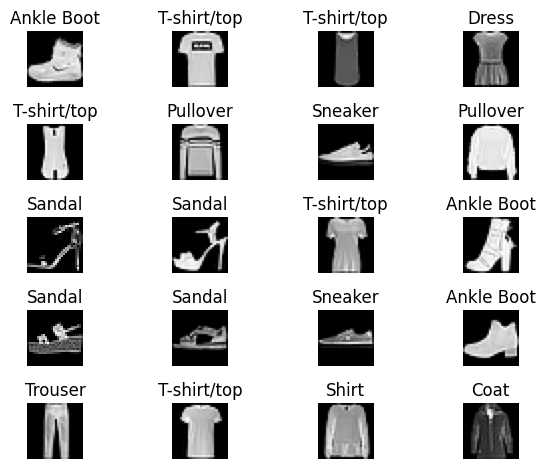

In [27]:
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(x_train[i].squeeze(),cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [28]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
history = model.fit(x_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7698 - loss: 0.6589 - val_accuracy: 0.8590 - val_loss: 0.3864
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8603 - loss: 0.3814 - val_accuracy: 0.8712 - val_loss: 0.3509
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8727 - loss: 0.3411 - val_accuracy: 0.8707 - val_loss: 0.3629
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8830 - loss: 0.3186 - val_accuracy: 0.8765 - val_loss: 0.3379
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8908 - loss: 0.2927 - val_accuracy: 0.8767 - val_loss: 0.3414
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8963 - loss: 0.2769 - val_accuracy: 0.8710 - val_loss: 0.3529
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9012 - loss: 0.2687 - val_accuracy: 0.8803 - val_loss: 0.3391
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9049 - loss: 0.2

In [30]:
test_loss, test_acc = model.evaluate(x_test,y_test,verbose=2)
print("Test Accuracy: "+str(test_acc))

313/313 - 1s - 2ms/step - accuracy: 0.8874 - loss: 0.3792
Test Accuracy: 0.8873999714851379


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted:  Ankle Boot
Actual:  Ankle Boot


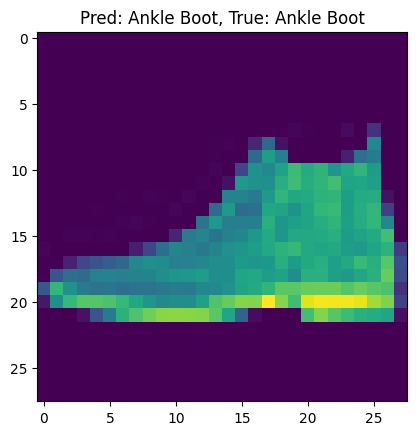

In [31]:
predictions = model.predict(x_test)

import numpy as np
print("Predicted: ", class_names[np.argmax(predictions[0])])
print("Actual: ", class_names[y_test[0]])

plt.imshow(x_test[0])
plt.title(f"Pred: {class_names[np.argmax(predictions[0])]}, True: {class_names[y_test[0]]}") 
plt.show()

In [33]:
# saving model
model.export("fashion_mnist_model")

INFO:tensorflow:Assets written to: fashion_mnist_model\assets


INFO:tensorflow:Assets written to: fashion_mnist_model\assets


Saved artifact at 'fashion_mnist_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor_15')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1744530159184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1744530152464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1744530154000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1744530156688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1744530158608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1744530155920: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [35]:
converter = tf.lite.TFLiteConverter.from_saved_model("fashion_mnist_model")
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()

file = open(r"fashion_mnist_model.tflite","wb")
file.write(tflite_model)

116648